# USL Mini Project

# Online Shoppers Intention

# Problem Statement:

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well. Analyse and compare the clusters formed with the existing Revenue Column.

# Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

# Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_online = pd.read_csv('online_shoppers_intention.csv')
df_online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

All the columns have correct data types.

There are no missing values in the data.

### Univariate Analysis

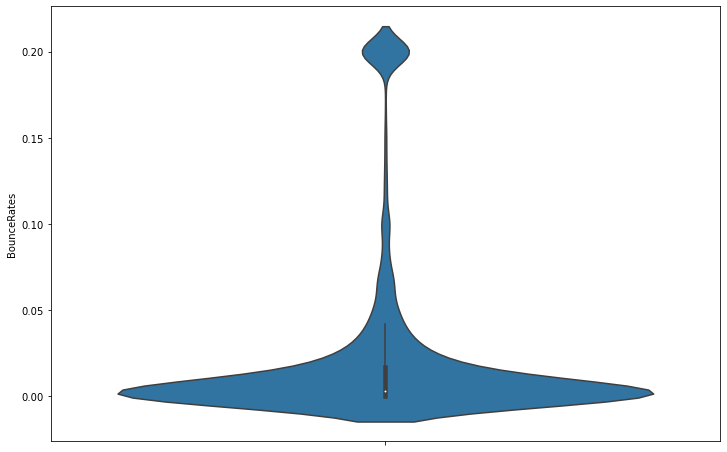

In [5]:
plt.figure(figsize = (12,8))
sns.axes_style("dark")
sns.violinplot(y = df_online["BounceRates"])
plt.show()

From the above violin plot we can see that the bounce rate is most likely to be in between 0 to 0.05 else it will be in the range of 0.2

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


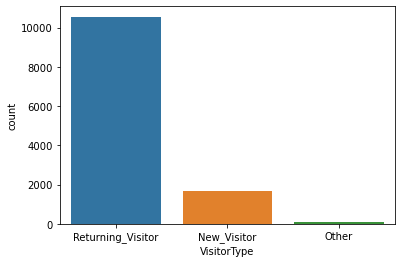

In [7]:
sns.countplot(df_online['VisitorType'])
plt.show()

From the above plot we can see that Returning_Visitors are higher than New_Visitor and other. 

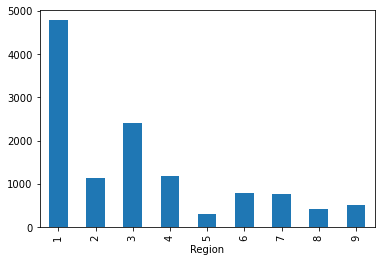

In [8]:
df_online.groupby('Region')['Revenue'].count().plot(kind='bar')
plt.show()

Region one has the most number of visitors.

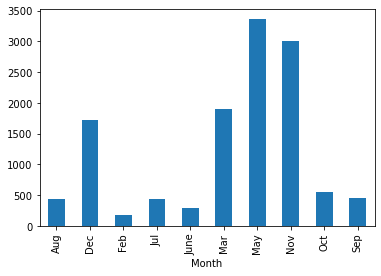

In [10]:
df_online.groupby('Month')['Revenue'].count().plot(kind='bar')
plt.show()

From the above plot we can clearly see that May and November has the higher number of visiters.

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


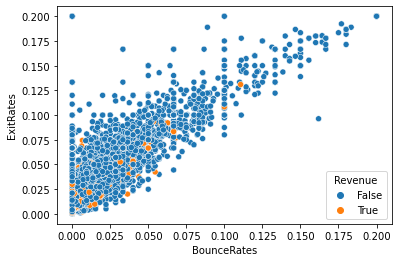

In [11]:
sns.scatterplot(df_online['BounceRates'],df_online['ExitRates'],hue = df_online['Revenue'])
plt.show()

From the above plot we can clearly see that if the bounce rate and Exit rates are low then the probability of buying a product is high.

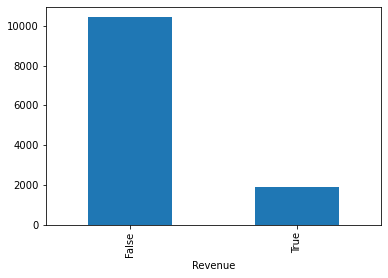

In [12]:
df_online.groupby('Revenue')['Weekend'].count().plot(kind='bar')
plt.show()

From the above plot we can clearly see that there is no impact of weekend on buying rate of the customers.

In [13]:
df_numeric = df_online.drop(['Revenue','Weekend','Month','VisitorType'],axis=1)

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


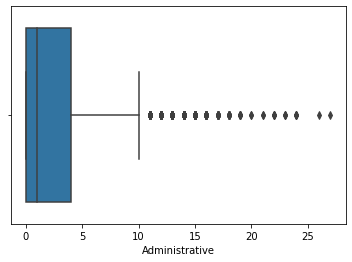

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


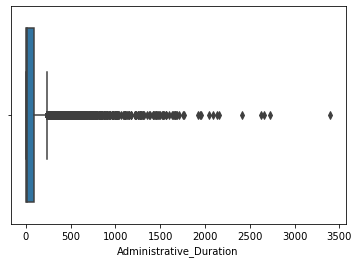

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


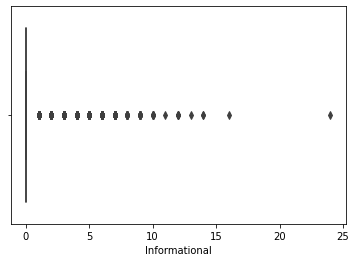

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


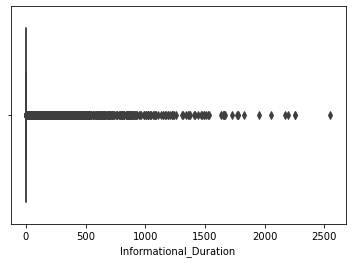

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


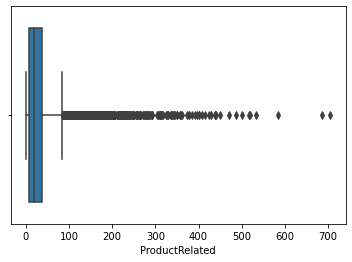

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


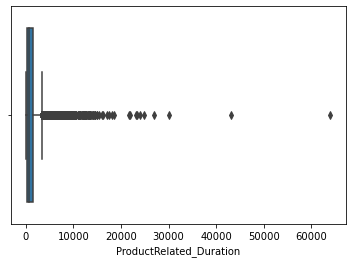

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


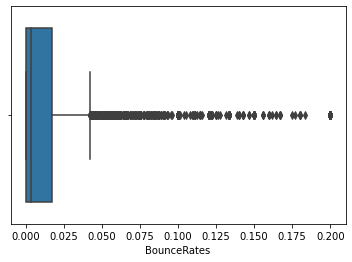

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


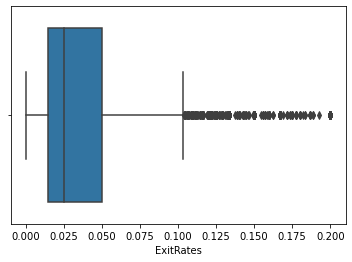

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


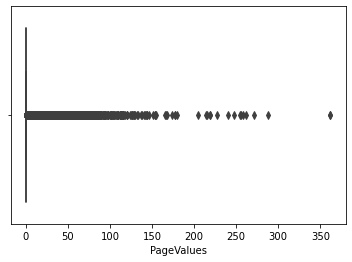

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


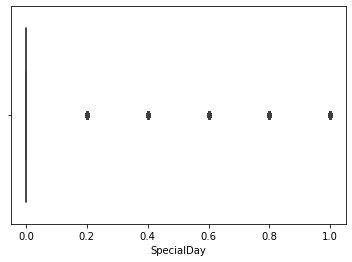

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


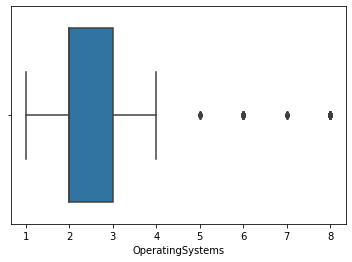

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


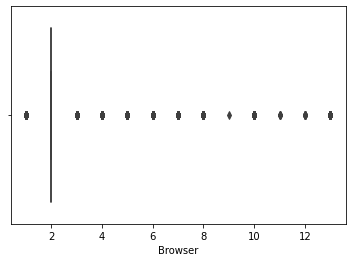

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


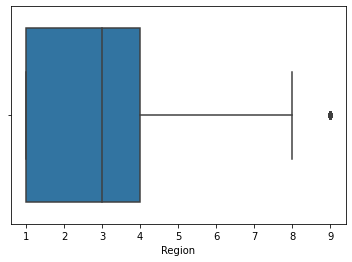

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


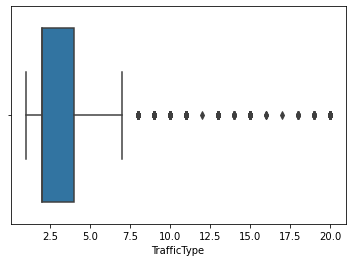

In [14]:
for i in df_numeric.columns:
    sns.boxplot(df_numeric[i])
    plt.show()

Outliers are present in the dataset. 

In [15]:
df_numeric.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [16]:
df_numeric.shape

(12330, 14)

Treating the outliers present in the dataset

In [20]:
Q1 = df_online.quantile(0.25)
Q3 = df_online.quantile(0.75)
IQR = Q3 - Q1
UF = Q3 + 1.5*(IQR)
LF = Q1 - 1.5*(IQR)
df_out = df_online[~((df_online < LF)|(df_online > UF)).any(axis=1)]
df_online = df_out.reset_index(drop=True)

In [21]:
df_online.shape

(1914, 18)

Because of outllier treatment we are loosing lot of data so we will keep all the outliers for extreme cases during analysis. 

In [22]:
df_online = pd.read_csv('online_shoppers_intention.csv')
df_online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


No null values are present in the dataset.

Now we can go for encoding and standard scaling of the data we have with us.

There is no impact of month and weekend on target variable so we can drop them. 

In [26]:
y = df_online['Revenue']

In [27]:
df_X = df_online.drop(['Revenue','Weekend','Month'],axis=1)

In [28]:
df_encoded = pd.get_dummies(df_X,drop_first=True)

standard Scaling of  the Data.

In [29]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df_std = std_sc.fit_transform(df_encoded)
df_std = pd.DataFrame(df_std,columns = df_encoded.columns)
df_std.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.083316,0.410621
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.083316,0.410621
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,-0.083316,0.410621
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,-0.083316,0.410621
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,-0.083316,0.410621


In [30]:
df_std.shape

(12330, 16)

Since the dataset is large we will go ahead with k-means clustering.

In [32]:
from sklearn.cluster import KMeans

In [33]:
WCSS = []
for i in range(1,17):
    k_means = KMeans(n_clusters = i, random_state = 10)
    k_means.fit(df_std)
    WCSS.append(k_means.inertia_)

In [34]:
WCSS

[197280.00000000026,
 173485.9109163235,
 153737.53675247208,
 137946.41837839378,
 126329.90539327872,
 116974.43818384194,
 109790.45756977503,
 104457.7532316506,
 98419.40208856018,
 92975.51452527664,
 89401.27202813199,
 84447.77583843905,
 81188.2575754347,
 79010.18345816313,
 76065.97728553296,
 73629.71783153487]

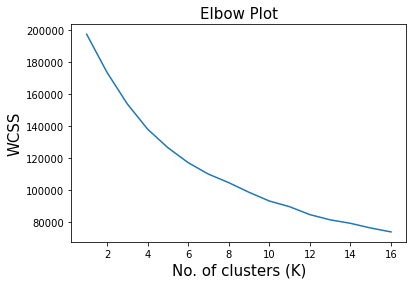

In [35]:
plt.plot(range(1,17), WCSS)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [37]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [38]:
n_clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
l1=[]
l2=[]
for K in n_clusters:
    clusters = KMeans(n_clusters=K)
    predict = clusters.fit_predict(df_std)
    l1.append(K)
    score = silhouette_score(df_std,predict,random_state=10)
    l2.append(score)
    print('for {} cluster the silhoutte score is {}'.format(K,score))

for 2 cluster the silhoutte score is 0.29000585702594106
for 3 cluster the silhoutte score is 0.28862197965975456
for 4 cluster the silhoutte score is 0.29287404740624956
for 5 cluster the silhoutte score is 0.2501798596099853
for 6 cluster the silhoutte score is 0.21418991202644982
for 7 cluster the silhoutte score is 0.23488858204988827
for 8 cluster the silhoutte score is 0.18083027928537818
for 9 cluster the silhoutte score is 0.18844839424053744
for 10 cluster the silhoutte score is 0.19364956251921178
for 11 cluster the silhoutte score is 0.2255869357234977
for 12 cluster the silhoutte score is 0.20346726715095506
for 13 cluster the silhoutte score is 0.20627609852760093
for 14 cluster the silhoutte score is 0.1828747664153497
for 15 cluster the silhoutte score is 0.20479755445114103
for 16 cluster the silhoutte score is 0.20449301917299287


In [39]:
max(l2)

0.29287404740624956

Referring to elbow plot and silhoutee score we can see that 4 clusters can be formed.

In [40]:
import matplotlib.cm as cm

In [41]:
k_mean3 = KMeans(n_clusters=4,random_state=15,max_iter=200,tol=0.001)
k_mean3.fit(df_std)

KMeans(max_iter=200, n_clusters=4, random_state=15, tol=0.001)

In [42]:
result = k_mean3.labels_

In [43]:
result = pd.DataFrame(result,columns=['clusters'])

In [44]:
df_X['clusters'] = result['clusters']

In [45]:
df_X['clusters'].value_counts()

1    9581
0    1617
3    1047
2      85
Name: clusters, dtype: int64

E:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


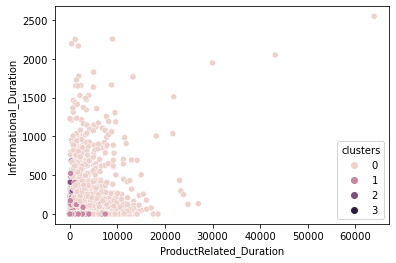

In [46]:
sns.scatterplot(df_X['ProductRelated_Duration'], df_X['Informational_Duration'], hue=df_X['clusters'])
plt.show()

In [47]:
df_X.groupby('clusters').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
clusters,,,,,,,,,,,,,,
0,7.352505,305.122471,2.534323,213.764076,97.272727,3851.554853,0.006382,0.019629,9.470638,0.029932,2.106988,2.213976,2.918367,3.616574
1,1.719862,51.792733,0.216992,8.172183,23.960547,875.820833,0.009120,0.031979,5.819249,0.061497,2.091953,2.334829,3.166475,3.961069
2,1.470588,62.695588,0.176471,11.685490,12.470588,570.404862,0.038551,0.063349,18.191812,0.000000,5.823529,8.894118,6.882353,13.682353
3,0.051576,1.485323,0.016237,0.092837,3.183381,60.680879,0.164895,0.179150,0.000000,0.114422,2.143266,2.251194,3.022923,4.981853


Now four clusters are formed based on information duration and the product related duration.

There are so many products with medium number of product related duration.

### Principal Component Analysis

In [48]:
df_online

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [49]:
y = df_online['Revenue']

In [50]:
df_X = df_online.drop(['Revenue','Weekend','Month'],axis=1)

In [51]:
df_encoded = pd.get_dummies(df_X,drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [52]:
std_sc = StandardScaler()
df_std = std_sc.fit_transform(df_encoded)

In [53]:
cov_mat = np.cov(df_std.T)
print(cov_mat[0:5])

[[ 1.00008111  0.60163214  0.376881    0.25586889  0.43115431  0.37396934
  -0.22358076 -0.31650867  0.09899761 -0.09478528 -0.00634758 -0.0250366
  -0.00548725 -0.03356343 -0.02118611 -0.02288568]
 [ 0.60163214  1.00008111  0.30273426  0.2380501   0.28911007  0.35545078
  -0.1441821  -0.20581445  0.06761396 -0.07330967 -0.00734401 -0.01539278
  -0.00556101 -0.0143776  -0.00854245 -0.02252635]
 [ 0.376881    0.30273426  1.00008111  0.61900506  0.37419464  0.38753674
  -0.11612303 -0.16367934  0.04863564 -0.04822317 -0.00952744 -0.03823778
  -0.029171   -0.03449355 -0.0214587   0.05740366]
 [ 0.25586889  0.2380501   0.61900506  1.00008111  0.28006898  0.34739175
  -0.07407262 -0.10528422  0.03086338 -0.03057903 -0.00957945 -0.01928655
  -0.02714631 -0.02467691 -0.01349031  0.04550449]
 [ 0.43115431  0.28911007  0.37419464  0.28006898  1.00008111  0.86099667
  -0.20459423 -0.29255001  0.05628636 -0.02396012  0.00428997 -0.01314679
  -0.03812493 -0.0430678  -0.03608595  0.12874825]]


In [54]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

eig_val

array([3.41196435, 1.85593317, 1.72647779, 0.07590193, 0.12282838,
       0.35138429, 0.42129828, 0.58280618, 1.15264715, 0.75472517,
       0.81799212, 0.86741197, 1.0126394 , 0.91920493, 0.97250763,
       0.95557501])

In [55]:
eig_pair = [(eig_val[index],eig_vec[:,index])for index in range(len(eig_val))]

In [56]:
eig_pair.sort()

In [57]:
eig_pair.reverse()

In [58]:
eig_val=[eig_pair[index][0]for index in range(len(eig_val))]

In [59]:
eig_vec=[eig_pair[index][1]for index in range(len(eig_vec))]

In [60]:
eig_val

[3.4119643493669534,
 1.8559331738823293,
 1.7264777850230435,
 1.1526471527725441,
 1.0126394008021806,
 0.9725076260396177,
 0.9555750084569616,
 0.9192049323322871,
 0.8674119694523041,
 0.8179921228118517,
 0.7547251703720177,
 0.5828061763534657,
 0.42129828029438543,
 0.35138429028281265,
 0.12282838211044463,
 0.07590193291146498]

Using Kaiser method we can see that number of columns can be reduced to five.

In [61]:
percent_var=[]
for i in eig_val:
    variance=(i/sum(eig_val))*100
    percent_var.append(variance)

In [62]:
percent_var

[21.323047680122244,
 11.59864157582889,
 10.789611015586527,
 7.203460435184862,
 6.328482954425225,
 6.077679704705213,
 5.971859427851723,
 5.744564887836965,
 5.420885123366513,
 5.112036132475324,
 4.716649749349456,
 3.6422431813979506,
 2.632900698372606,
 2.1959736997652053,
 0.7676151272504418,
 0.4743486064808656]

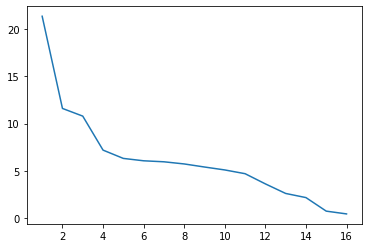

In [63]:
plt.plot(range(1,17),percent_var)

We can confirm that the principal components are the same i.e. 5 if we refer elbow plot and we can cover around 57% of the data.

In [64]:
np.cumsum(percent_var)

array([ 21.32304768,  32.92168926,  43.71130027,  50.91476071,
        57.24324366,  63.32092337,  69.29278279,  75.03734768,
        80.4582328 ,  85.57026894,  90.28691869,  93.92916187,
        96.56206257,  98.75803627,  99.52565139, 100.        ])

In [65]:
eig_vec=np.array(eig_vec)

In [66]:
eigenvector=eig_vec[:,[0,1,2,3,4]]
eigenvector

array([[ 0.38070128,  0.32726983,  0.34703875,  0.29510893,  0.41086155],
       [ 0.01157903, -0.01149828, -0.14902723, -0.1561476 , -0.10885753],
       [ 0.05521437,  0.0969108 ,  0.20086268,  0.21777629,  0.13614349],
       [ 0.21769828,  0.2859076 ,  0.23193528,  0.24427321, -0.34560908],
       [-0.3428512 , -0.40458409,  0.44569313,  0.57419541, -0.18239697],
       [-0.11017485, -0.14205106,  0.05579821,  0.07913817,  0.04377317],
       [-0.26261451, -0.34298304, -0.04146128, -0.01717533,  0.23663997],
       [ 0.05178994,  0.07478871,  0.00170577, -0.00296671, -0.06891844],
       [ 0.10678323,  0.15620103, -0.04108005, -0.04373704, -0.01690436],
       [-0.15496399, -0.19232171, -0.06700875, -0.04456939,  0.30061673],
       [ 0.0256612 , -0.00559269,  0.01044268, -0.02872269, -0.02095283],
       [-0.01923869, -0.0324182 , -0.00765399,  0.034184  ,  0.04879223],
       [-0.57859165,  0.56256755, -0.3954529 ,  0.36336081, -0.10836748],
       [ 0.45108534, -0.30639051, -0.6

In [67]:
df_PCA_5 = pd.DataFrame(df_std.dot(eigenvector), columns= ['PC1','PC2','PC3','PC4','PCA5'])

In [68]:
df_PCA_5

,PC1,PC2,PC3,PC4,PCA5
0,-0.664769,-1.225807,0.063783,-1.515731,0.392274
1,0.429539,-0.079935,0.093804,-1.298494,-0.431139
2,-2.283589,0.477596,-1.531957,-0.127158,-0.021526
3,0.216259,-0.291634,-0.415307,-0.928717,-0.297184
4,0.414908,-0.590229,-0.134209,-0.914867,-0.260937
...,...,...,...,...,...
12325,0.146207,-0.453842,0.972027,-0.577249,-0.135230
12326,1.000026,-0.720988,-0.794002,-0.451824,-0.297144
12327,1.187152,-1.578731,-1.643058,0.197637,0.046816
12328,1.219085,-0.167989,-1.152546,0.704627,0.065095


Now going to perform kmeans clustering on it and taking size as 3.

In [69]:
k_mean3=KMeans(n_clusters=3,random_state=15,max_iter=200,tol=0.001)
k_mean3.fit(df_PCA_5)

KMeans(max_iter=200, n_clusters=3, random_state=15, tol=0.001)

In [70]:
result = k_mean3.labels_

In [71]:
result = pd.DataFrame(result,columns=['clusters'])

In [72]:
df_PCA_5['clusters'] = result['clusters']

In [73]:
df_PCA_5

,PC1,PC2,PC3,PC4,PCA5,clusters
0,-0.664769,-1.225807,0.063783,-1.515731,0.392274,1
1,0.429539,-0.079935,0.093804,-1.298494,-0.431139,1
2,-2.283589,0.477596,-1.531957,-0.127158,-0.021526,1
3,0.216259,-0.291634,-0.415307,-0.928717,-0.297184,1
4,0.414908,-0.590229,-0.134209,-0.914867,-0.260937,1
...,...,...,...,...,...,...
12325,0.146207,-0.453842,0.972027,-0.577249,-0.135230,1
12326,1.000026,-0.720988,-0.794002,-0.451824,-0.297144,0
12327,1.187152,-1.578731,-1.643058,0.197637,0.046816,0
12328,1.219085,-0.167989,-1.152546,0.704627,0.065095,0


In [74]:
df_PCA_5['clusters'].value_counts()

1    9068
0    1973
2    1289
Name: clusters, dtype: int64

In [75]:
df_PCA_5.groupby('clusters').mean()

,PC1,PC2,PC3,PC4,PCA5
clusters,,,,,
0,0.731965,-0.606795,-1.542606,0.861262,0.285841
1,-0.206247,0.092953,0.016999,-0.483708,-0.034162
2,0.330552,0.274872,2.241597,2.084556,-0.197194
